In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


# **Import Necessary Modules**

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# Load the Dataset

In [3]:
test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')
train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# Drop un-necessary columns

In [4]:
X = test.drop(columns=['label'])
y = test['label']

## Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
y_test

6252    6
4684    2
1731    3
4742    7
4521    2
       ..
8014    3
1074    8
3063    6
6487    9
4705    2
Name: label, Length: 3000, dtype: int64

## Normalizing the Data in range of 0-1

In [6]:
X_train/=255
X_test/=255

# Building ANN (Artificial Neural Network)

In [169]:
model = Sequential()

# model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Dense(256, activation='elu'))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

## Compiling the Model

In [170]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

## Callback - Earlystopping

In [171]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

## Training the Model

In [172]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=callback)

Epoch 1/1000
175/175 [==============================] - 3s 9ms/step - loss: 1.0418 - accuracy: 0.6596 - val_loss: 0.3477 - val_accuracy: 0.9064
Epoch 2/1000
175/175 [==============================] - 1s 8ms/step - loss: 0.5692 - accuracy: 0.8261 - val_loss: 0.2808 - val_accuracy: 0.9214
Epoch 3/1000
175/175 [==============================] - 1s 8ms/step - loss: 0.4707 - accuracy: 0.8512 - val_loss: 0.2684 - val_accuracy: 0.9207
Epoch 4/1000
175/175 [==============================] - 1s 8ms/step - loss: 0.4313 - accuracy: 0.8643 - val_loss: 0.2434 - val_accuracy: 0.9329
Epoch 5/1000
175/175 [==============================] - 1s 8ms/step - loss: 0.4015 - accuracy: 0.8745 - val_loss: 0.2256 - val_accuracy: 0.9264
Epoch 6/1000
175/175 [==============================] - 1s 8ms/step - loss: 0.3628 - accuracy: 0.8873 - val_loss: 0.2263 - val_accuracy: 0.9293
Epoch 7/1000
175/175 [==============================] - 1s 9ms/step - loss: 0.3431 - accuracy: 0.8932 - val_loss: 0.2077 - val_accuracy:

## Testing the Model

In [173]:
y_pred = model.predict(X_test)
y_pred_label = y_pred.argmax(axis=1)

94/94 [==============================] - 1s 4ms/step


In [174]:
accuracy_score(y_test, y_pred_label)

0.9603333333333334

## Plot is representing that approximately after 0.1** loss again tends to increase 
and the difference between both plots representing that model is overfitting

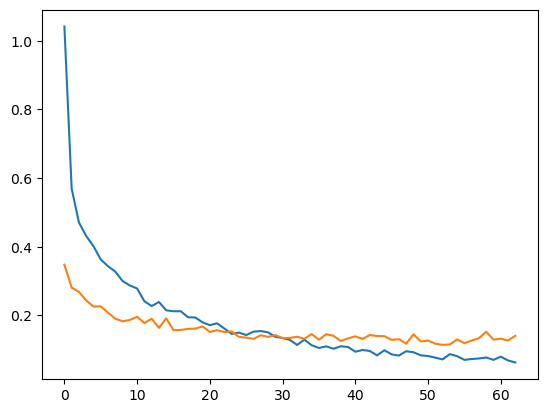

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

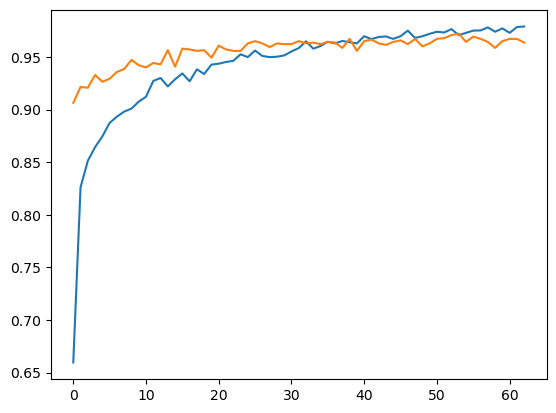

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Correct Predcition

In [181]:
error_ind = []
error_img = []
for i, x in enumerate(y_test):
    if y_test.iloc[i] == y_pred_label[i]:
        error_ind.append(i)
        error_img.append(X_test.iloc[i,:])

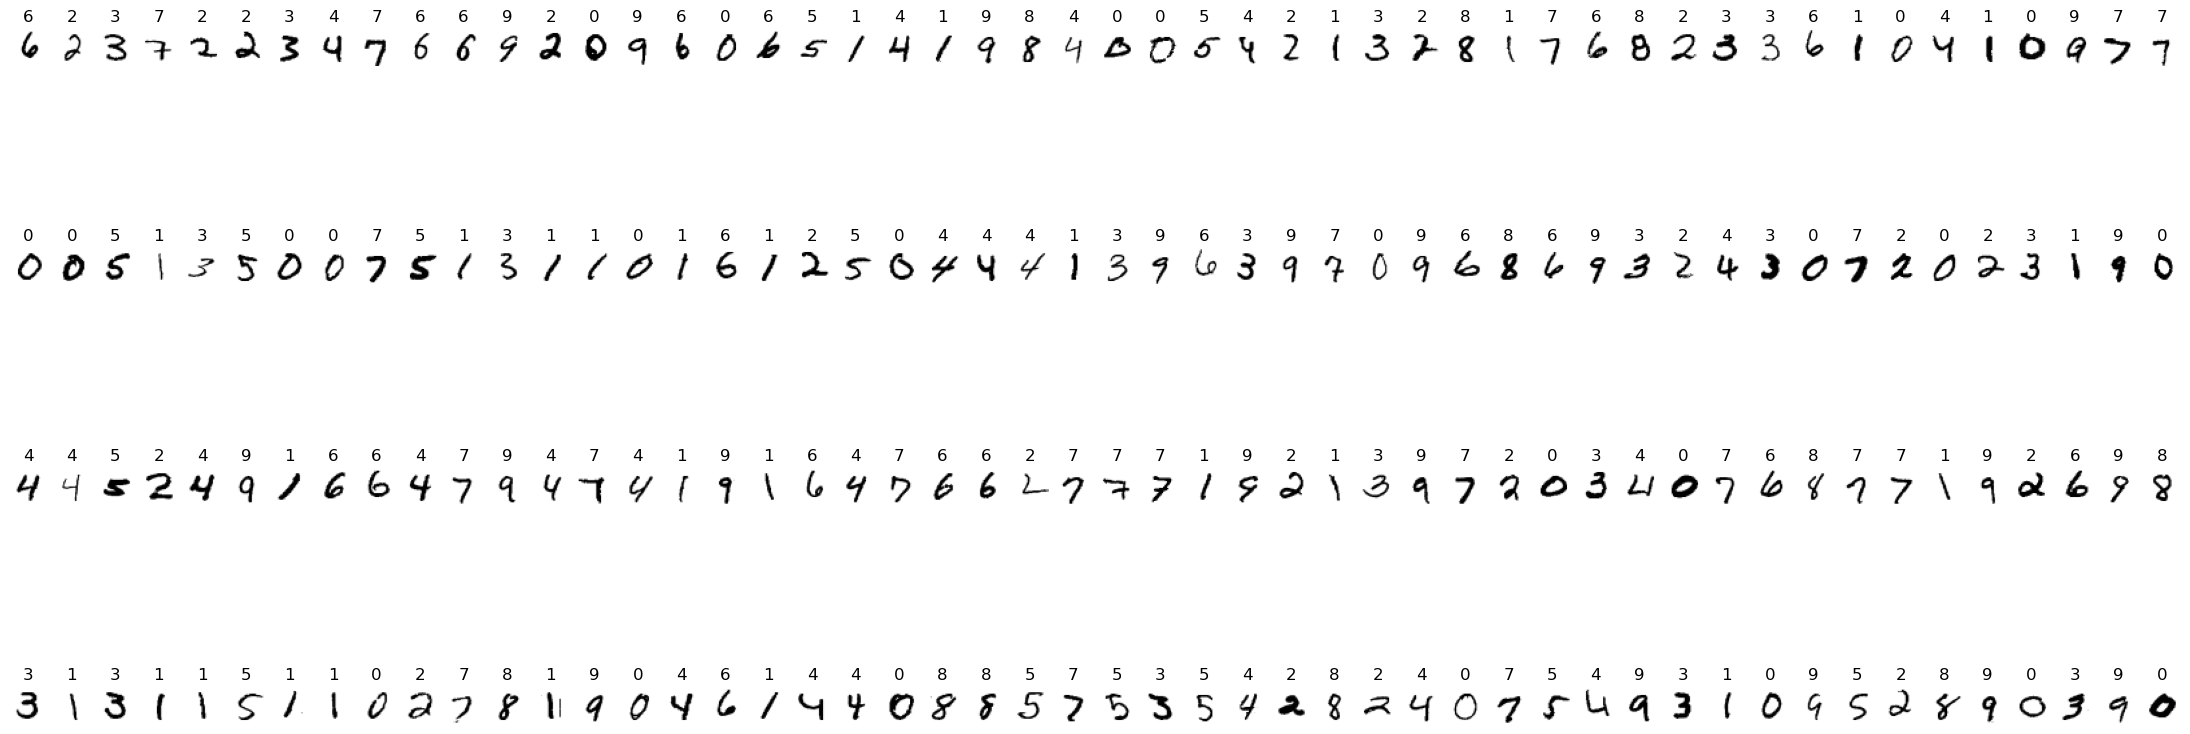

In [183]:
images = np.array(error_img).reshape(len(error_img),28,28)
plt.figure(figsize=(28,28))
for i in range(0, 200) :
    plt.subplot(10, 50, i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(y_pred_label[error_ind[i]])

# Wrong Predictions 

In [184]:
error_ind = []
error_img = []
for i, x in enumerate(y_test):
    if y_test.iloc[i] != y_pred_label[i]:
        error_ind.append(i)
        error_img.append(X_test.iloc[i,:])

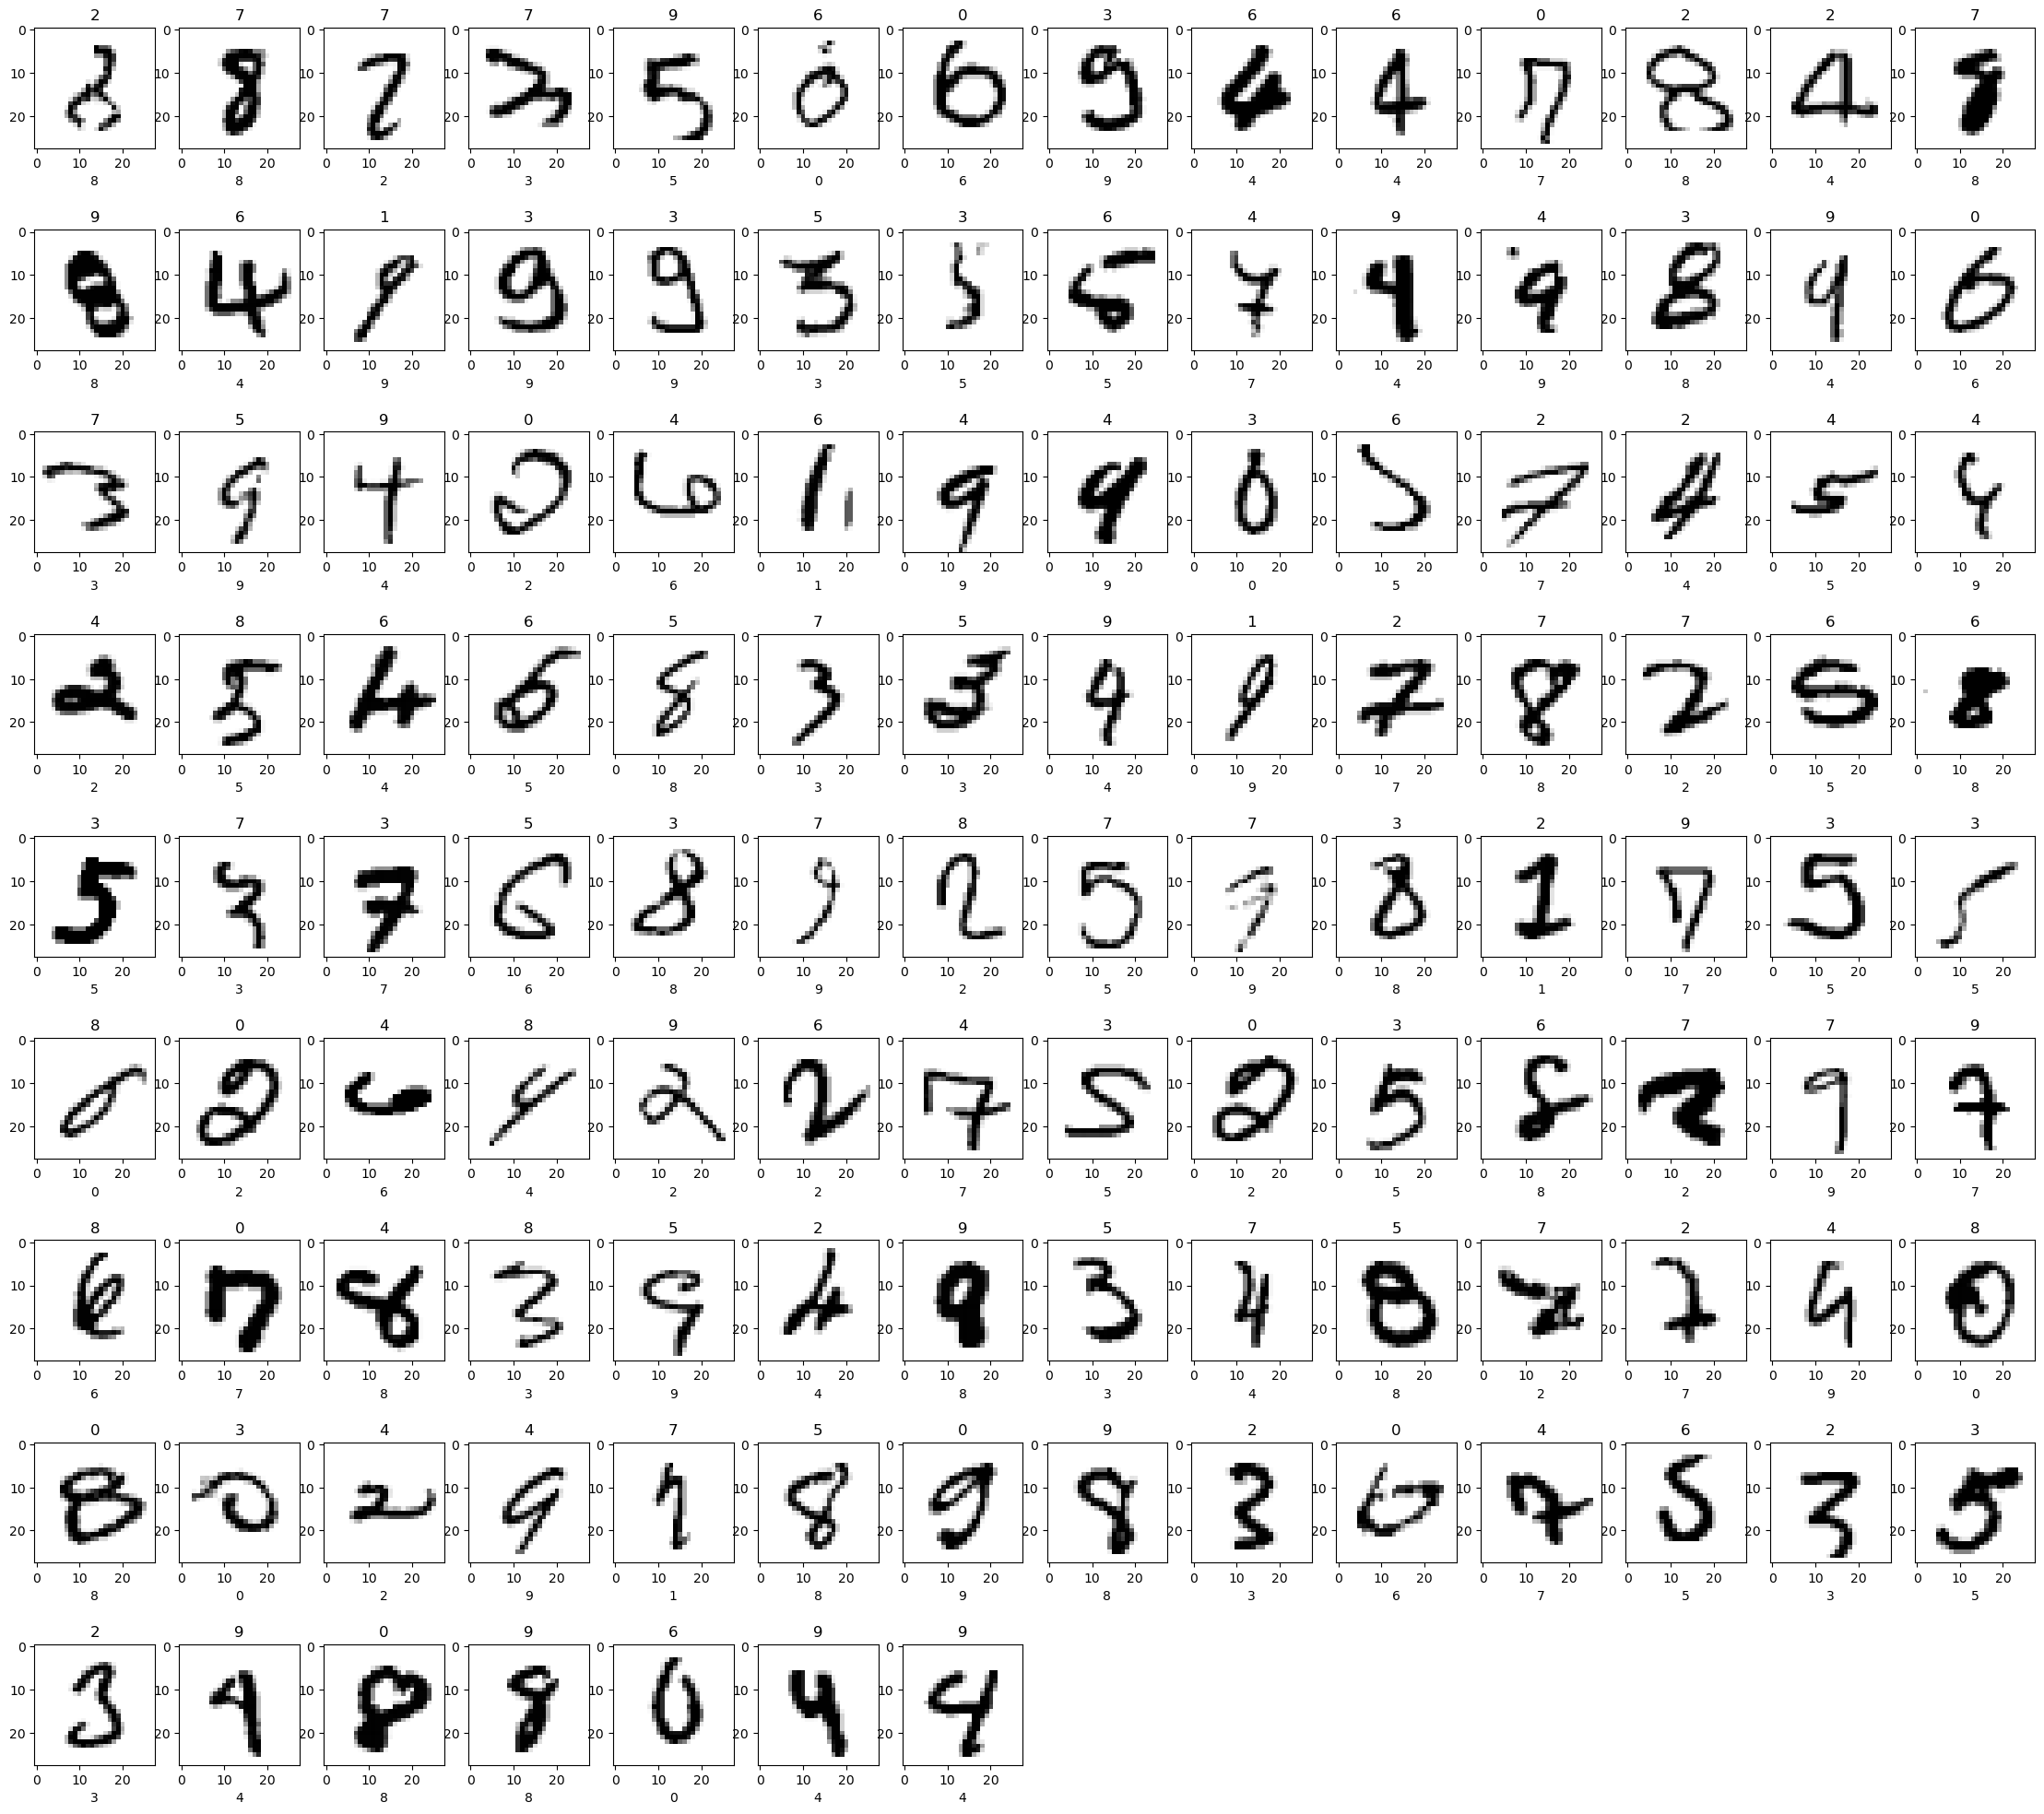

In [185]:
images = np.array(error_img).reshape(len(error_img),28,28)
plt.figure(figsize=(28,28))
for i in range(0, len(images)) :
    plt.subplot(10, 14, i+1)
    plt.xlabel(y_test.iloc[error_ind[i]])
    plt.imshow(images[i], cmap="gray_r")
    plt.title(y_pred_label[error_ind[i]])